In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("Loading data...")
(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train),'train sequences')
print(len(input_test),'test sequences')

input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape：',input_train.shape)
print('input_test shape：',input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
input_train shape： (25000, 500)
input_test shape： (25000, 500)


In [3]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,
                   epochs=10,
                   batch_size=32,
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 197s 316ms/step - loss: 0.5785 - acc: 0.6774 - val_loss: 0.4157 - val_acc: 0.8138
Epoch 2/10
625/625 [==============================] - 220s 351ms/step - loss: 0.3714 - acc: 0.8450 - val_loss: 0.3798 - val_acc: 0.8306
Epoch 3/10
625/625 [==============================] - 231s 369ms/step - loss: 0.2900 - acc: 0.8845 - val_loss: 0.3536 - val_acc: 0.8580
Epoch 4/10
625/625 [==============================] - 229s 367ms/step - loss: 0.2329 - acc: 0.9082 - val_loss: 0.4385 - val_acc: 0.8380
Epoch 5/10
625/625 [==============================] - 212s 340ms/step - loss: 0.2012 - acc: 0.9254 - val_loss: 0.4136 - val_acc: 0.8424
Epoch 6/10
625/625 [==============================] - 211s 337ms/step - loss: 0.1462 - acc: 0.9472 - val_loss: 0.4241 - val_acc: 0.8300
Epoch 7/10
625/625 [==============================] - 214s 342ms/step - loss: 0.1215 - acc: 0.9556 - val_loss: 0.5194 - val_acc: 0.7960
Epoch 8/10
625/625 [============================

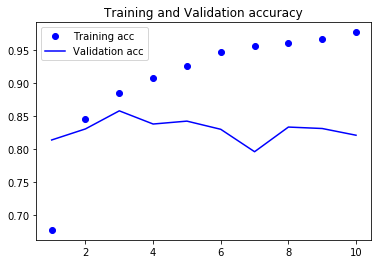

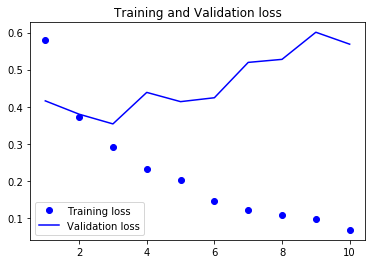

In [7]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 10s 63ms/step - loss: 0.5060 - acc: 0.7647 - val_loss: 0.6719 - val_acc: 0.7014
Epoch 2/10
157/157 [==============================] - 9s 57ms/step - loss: 0.2942 - acc: 0.8870 - val_loss: 0.3410 - val_acc: 0.8738
Epoch 3/10
157/157 [==============================] - 9s 58ms/step - loss: 0.2302 - acc: 0.9145 - val_loss: 0.3100 - val_acc: 0.8744
Epoch 4/10
157/157 [==============================] - 9s 57ms/step - loss: 0.1957 - acc: 0.9276 - val_loss: 0.3048 - val_acc: 0.8778
Epoch 5/10
157/157 [==============================] - 9s 58ms/step - loss: 0.1712 - acc: 0.9378 - val_loss: 0.3983 - val_acc: 0.8510
Epoch 6/10
157/157 [==============================] - 9s 58ms/step - loss: 0.1549 - acc: 0.9445 - val_loss: 0.3374 - val_acc: 0.8878
Epoch 7/10
157/157 [==============================] - 9s 57ms/step - loss: 0.1399 - acc: 0.9489 - val_loss: 0.3577 - val_acc: 0.8836
Epoch 8/10
157/157 [==============================] - 9s 58ms/step -

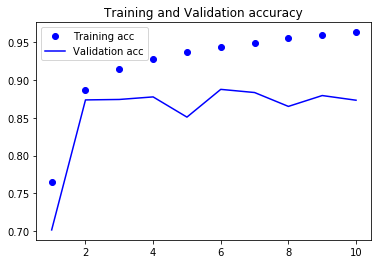

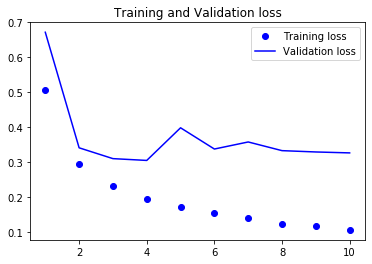

In [9]:
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()